## Producción eléctrica en España  `2015-2022`

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from datetime import datetime as dt

import requests
import json

import time
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
%run main.py

## Generación eléctrica
De `REData API` (API de Red Eléctrica Española) se extrae la `producción por tecnología` de electricidad desde `2015 hasta la fecha actual`. https://www.ree.es/es/apidatos

`FECHA ACTUAL`

In [3]:
today=dt.now().isoformat()[:10]
today

'2022-10-03'

`PRODUCCIÓN ENERGÍA 2015-2022`

In [4]:
df_2015=api_produccion('2015-01-01','2015-12-31')
df_2016=api_produccion('2016-01-01','2016-12-31')
df_2017=api_produccion('2017-01-01','2017-12-31')
df_2018=api_produccion('2018-01-01','2018-12-31')
df_2019=api_produccion('2019-01-01','2019-12-31')
df_2020=api_produccion('2020-01-01','2020-12-31')
df_2021=api_produccion('2021-01-01','2021-12-31')
df_2022=api_produccion_v2('2022-01-01',today)

Código de respuesta: 200. Datos desde 2015-01-01 hasta 2015-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2016-01-01 hasta 2016-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2017-01-01 hasta 2017-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2018-01-01 hasta 2018-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2019-01-01 hasta 2019-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2020-01-01 hasta 2020-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2021-01-01 hasta 2021-12-31. ¡REQUEST ACCEPTED!
Código de respuesta: 200. Datos desde 2022-01-01 hasta 2022-10-03. ¡REQUEST ACCEPTED!


------------------------------

`UNIÓN Y MODIFICACIÓN DE LOS DATAFRAMES`

In [5]:
lista_años=[df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022]
 
df_produccion=pd.concat(lista_años, ignore_index=True)
df_produccion.index=range(df_produccion.shape[0])
df_produccion['Fecha']=pd.to_datetime(df_produccion['Fecha'])
df_produccion=df_produccion.set_index('Fecha')
modify_zero(df_produccion)
df_produccion.to_csv('csv/produccion.csv')

### Análisis variables

In [6]:
columnas=df_produccion.columns
stats_info(df_produccion,columnas)

Datos estadísticos de la variable Hidraulica:
Calculando...
Desviación estándard: 38221.056
Primer Cuartil -> Q1: 47937.709
Tercer Cuartil -> Q3: 94417.412
Rango intercuartilico (IQR): 46479.703
Se considera outlier valores superiores a 164136.966 e inferior a -21781.845
Media: 75749.046
Mediana: 66872.501
Mínimo: 750.6
Máximo: 212677.595 

Datos estadísticos de la variable Turbina_bombeo:
Calculando...
Desviación estándard: 5096.378
Primer Cuartil -> Q1: 2846.956
Tercer Cuartil -> Q3: 10143.72
Rango intercuartilico (IQR): 7296.764
Se considera outlier valores superiores a 21088.866 e inferior a -8098.19
Media: 6981.858
Mediana: 6152.109
Mínimo: -61.078
Máximo: 30484.42 

Datos estadísticos de la variable Nuclear:
Calculando...
Desviación estándard: 22042.312
Primer Cuartil -> Q1: 141408.841
Tercer Cuartil -> Q3: 167889.972
Rango intercuartilico (IQR): 26481.131
Se considera outlier valores superiores a 207611.669 e inferior a 101687.144
Media: 150656.948
Mediana: 161418.022
Mínimo: 60

Existen valores bajos e incluso negativos los cuales corresponden a exportación de energía elétrica.

-----------------------------------------
### Visualización
`TEMPORALIDAD`

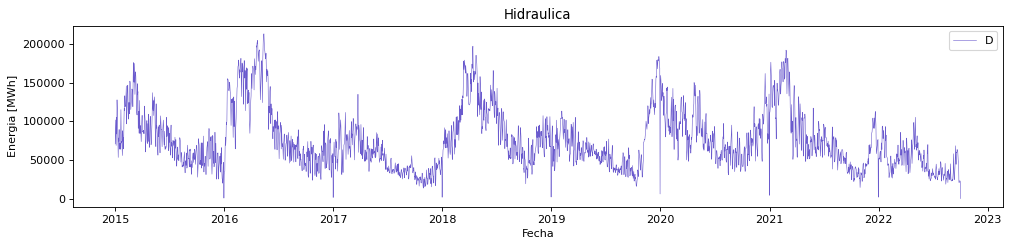

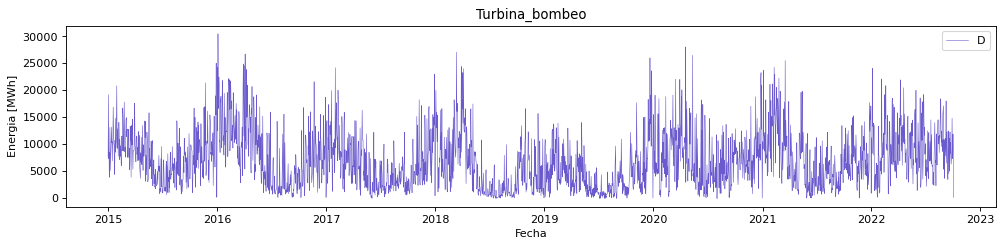

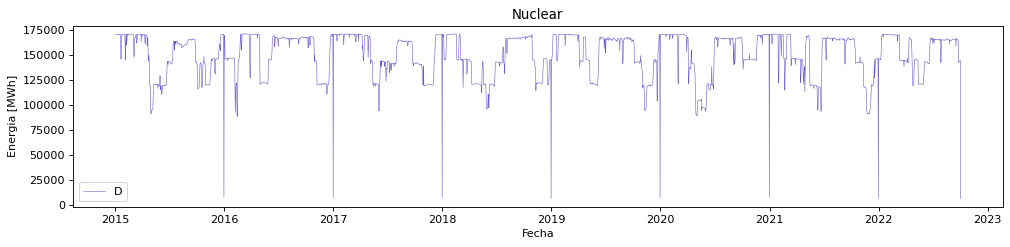

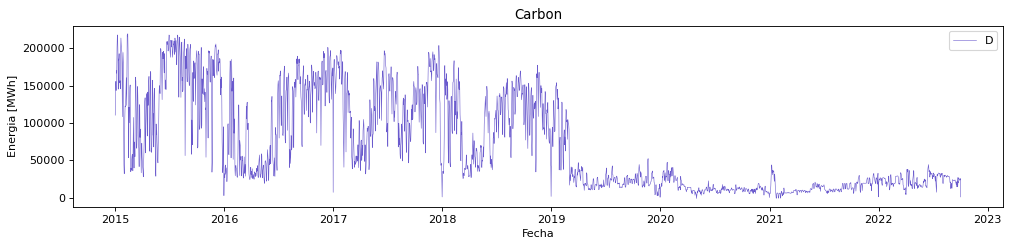

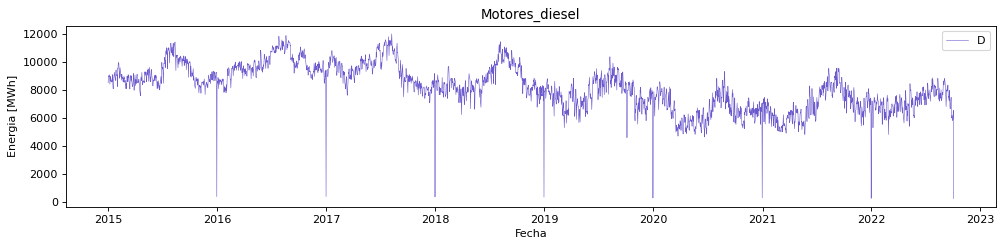

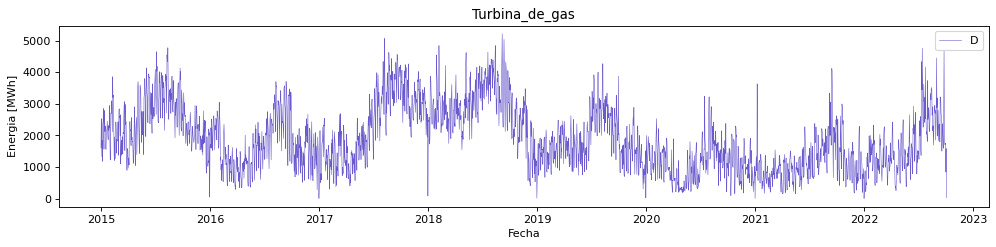

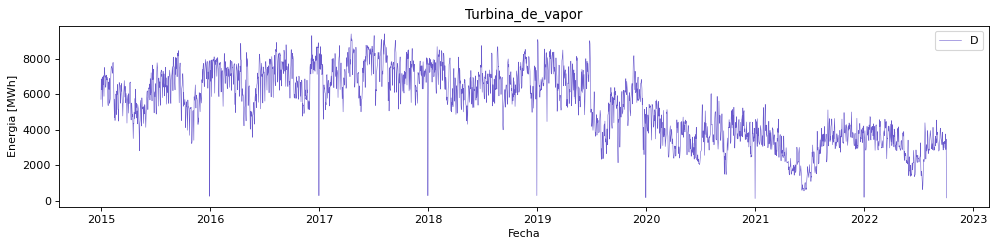

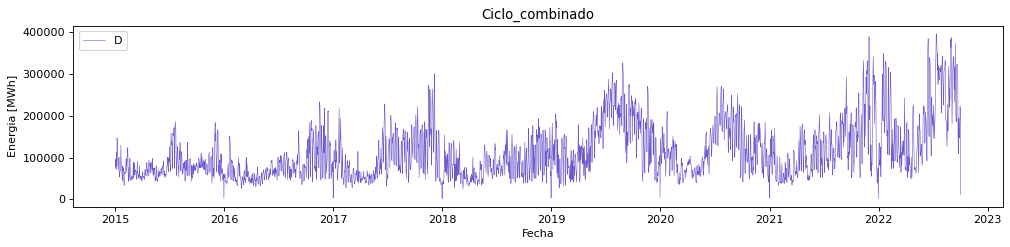

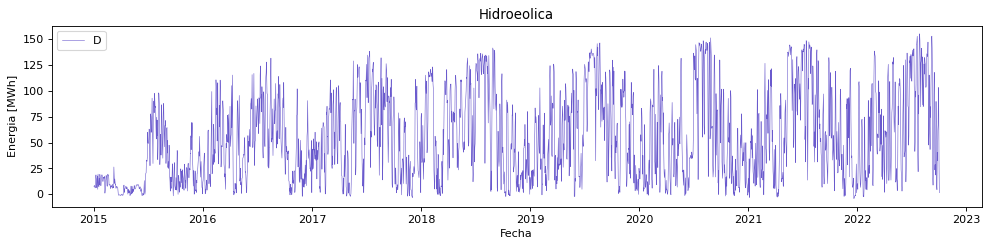

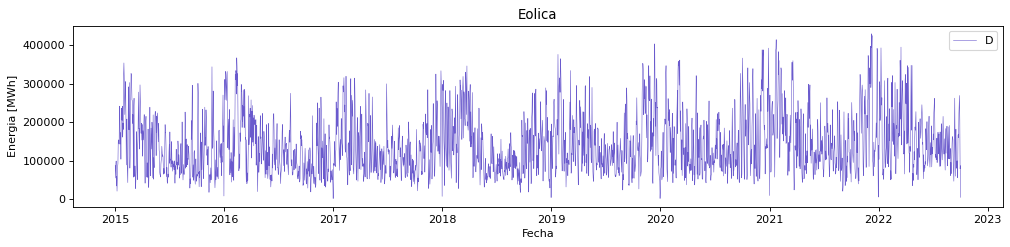

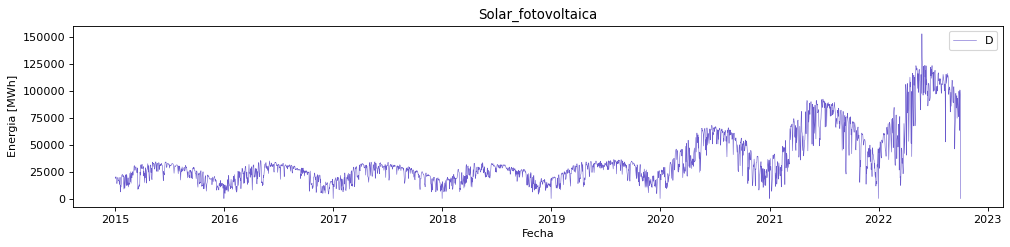

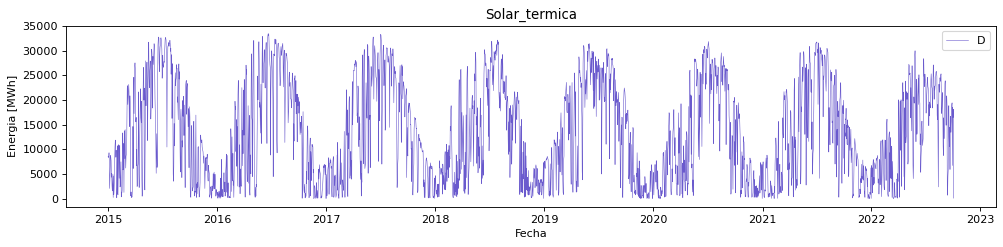

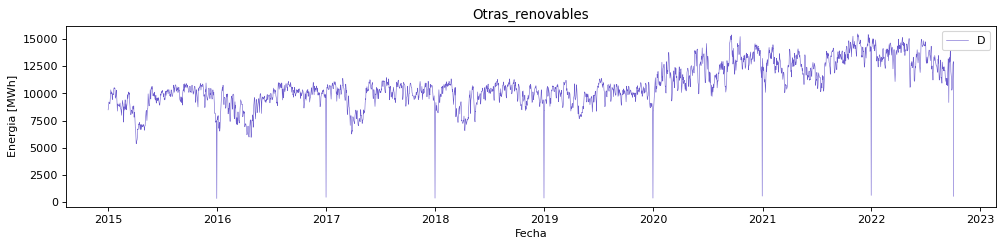

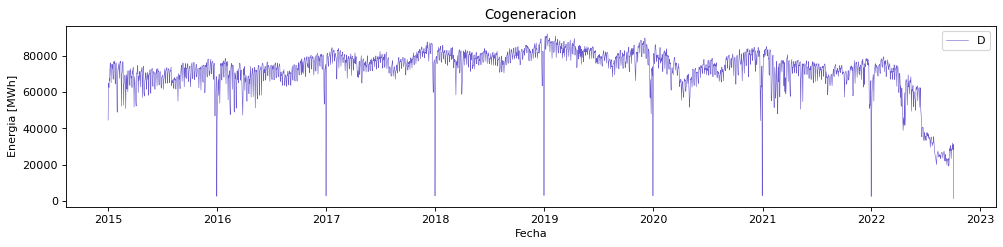

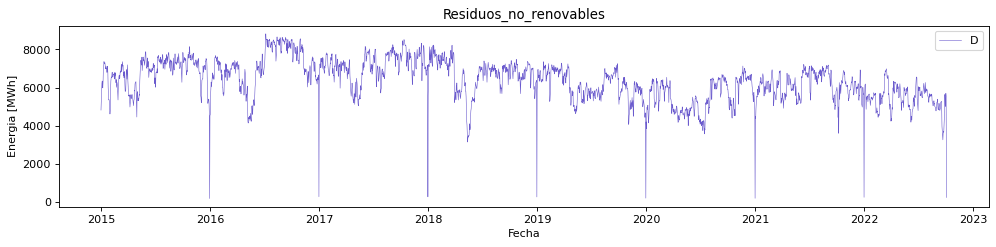

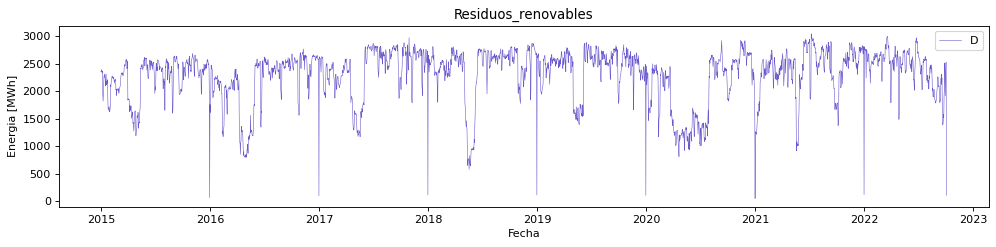

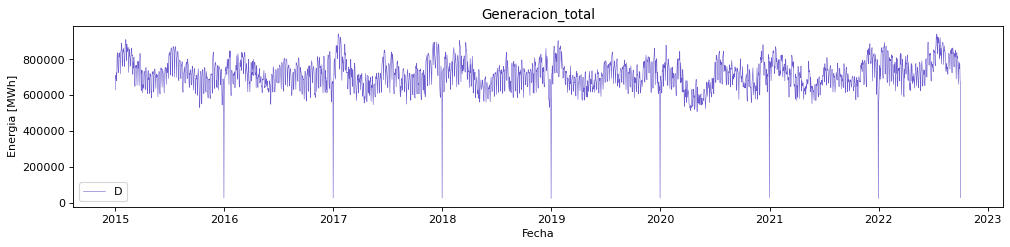

In [7]:
for i in df_produccion.columns:
    figure(figsize=(15,3), dpi=80)
    plt.plot(df_produccion[i], color='slateblue', linewidth=0.5)
    plt.xlabel('Fecha')
    plt.ylabel(f'Energia [MWh]')
    plt.title(i)
    plt.savefig(f"images/Produccion_electrica_{i}.jpg",bbox_inches='tight',dpi=300)
    plt.legend('Demanda')
    plt.show()

`DISTRIBUCIÓN`

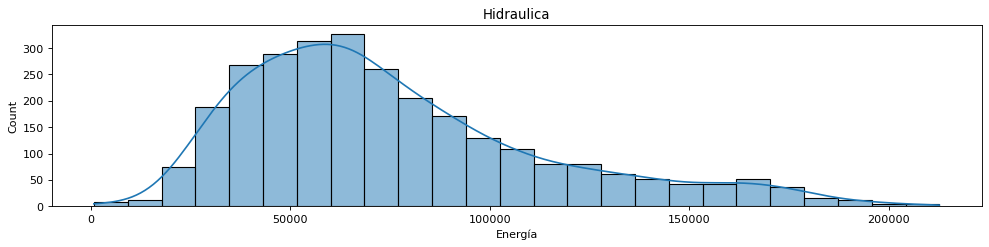

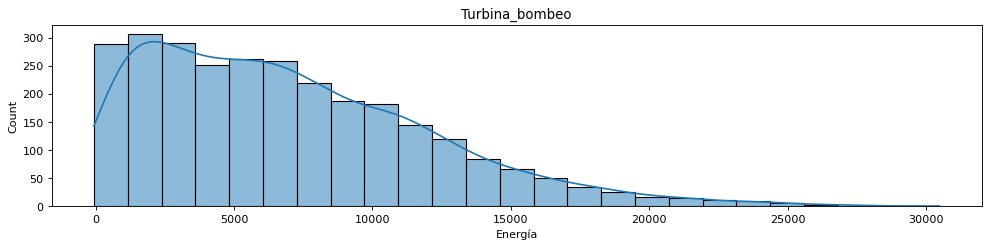

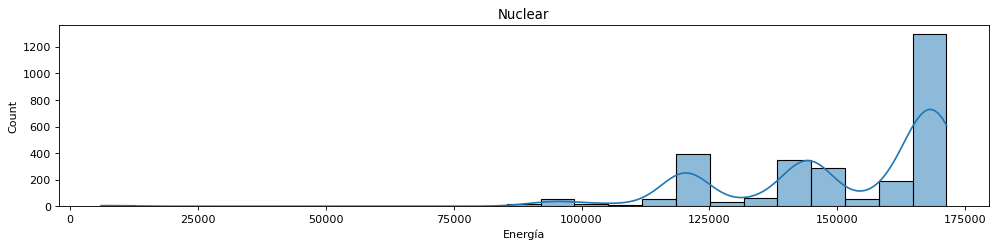

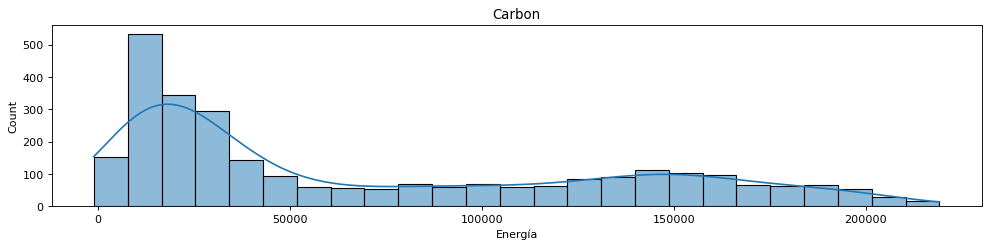

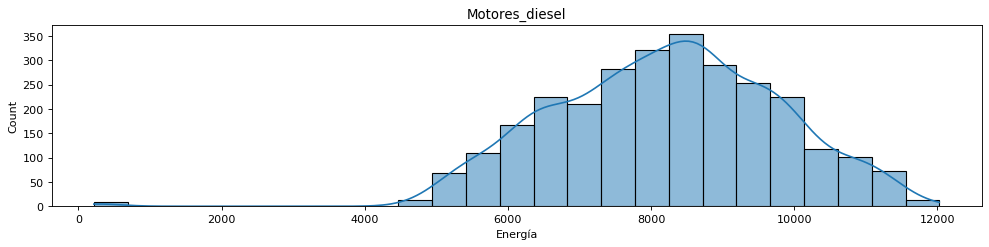

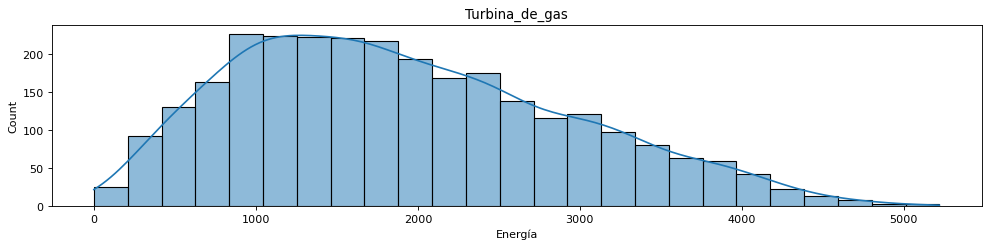

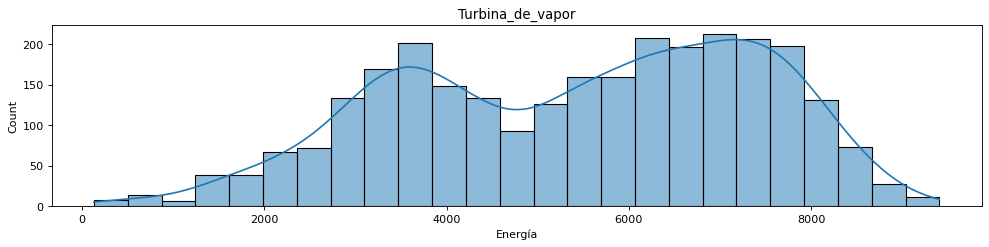

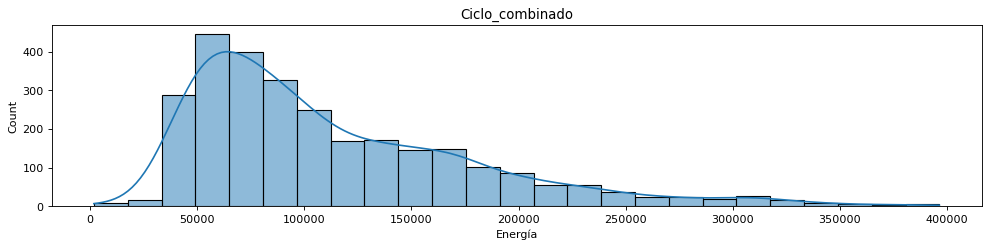

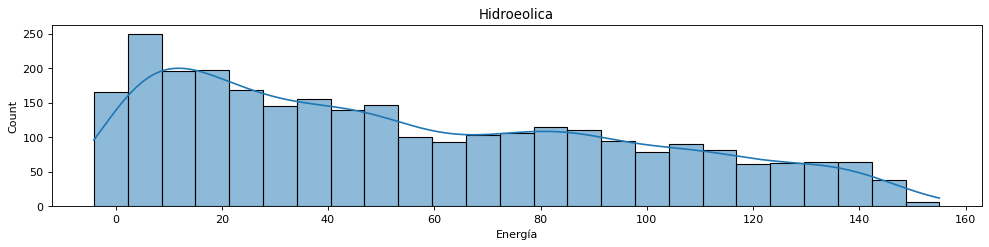

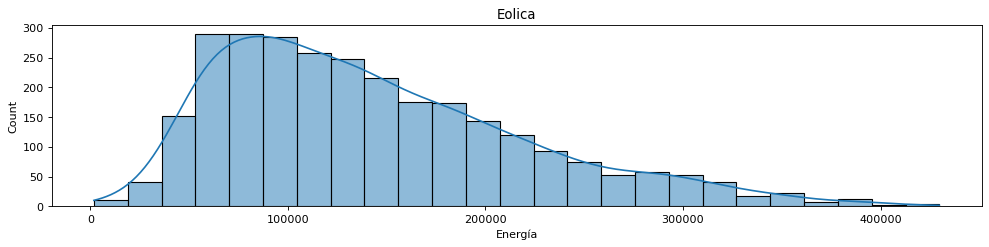

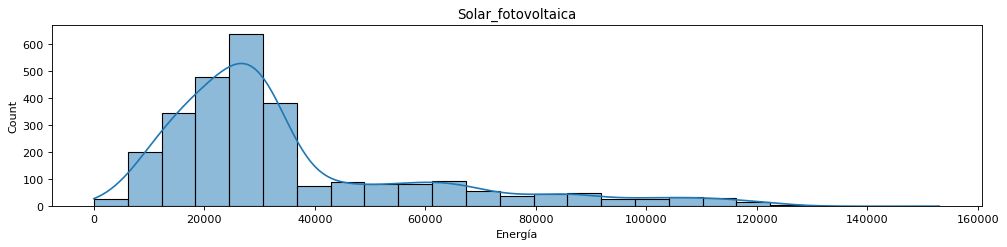

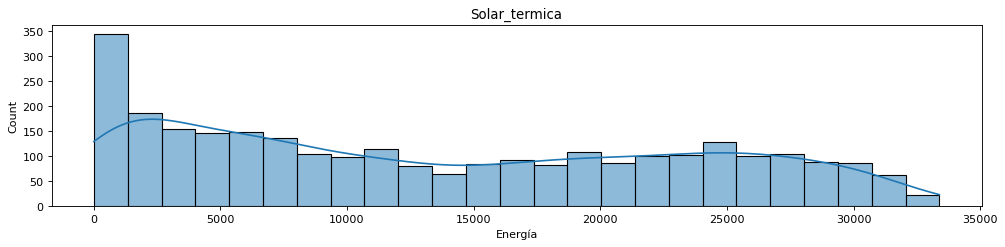

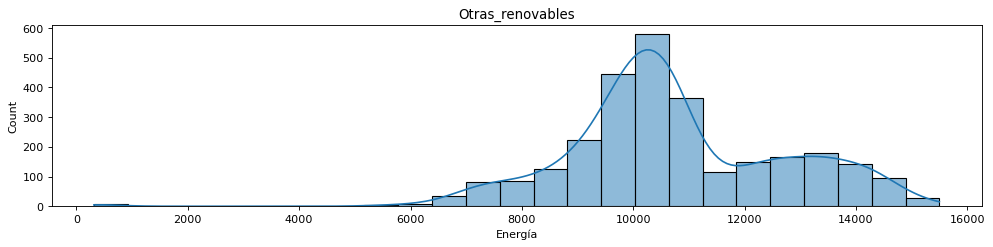

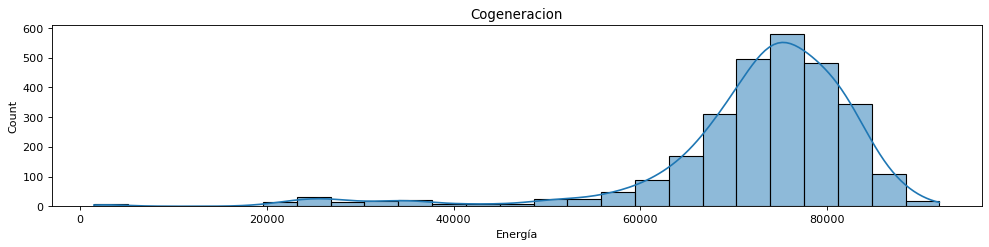

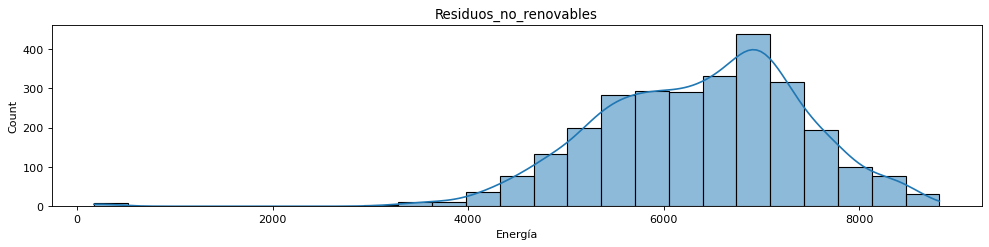

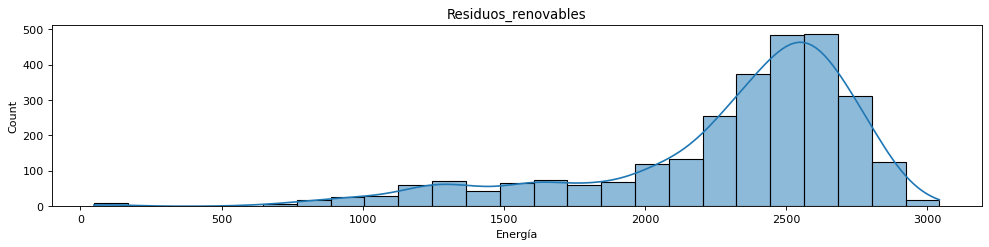

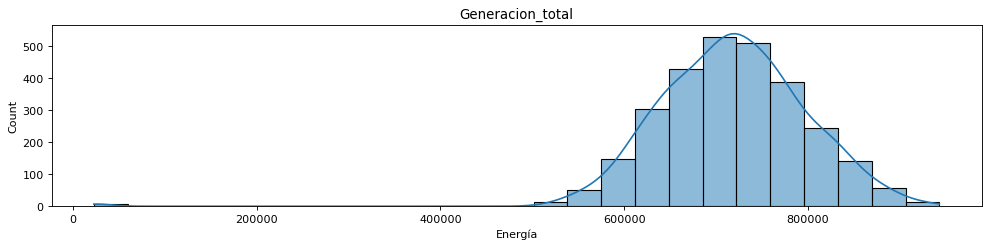

In [8]:
for i in df_produccion.columns:
    figure(figsize=(15,3), dpi=80)
    sns.histplot(df_produccion[i], kde=True, bins=25)
    plt.xlabel('Energía')
    plt.title(i)
    plt.show()

`COMPARATIVA DE ENERGÍAS RENOVABLES`

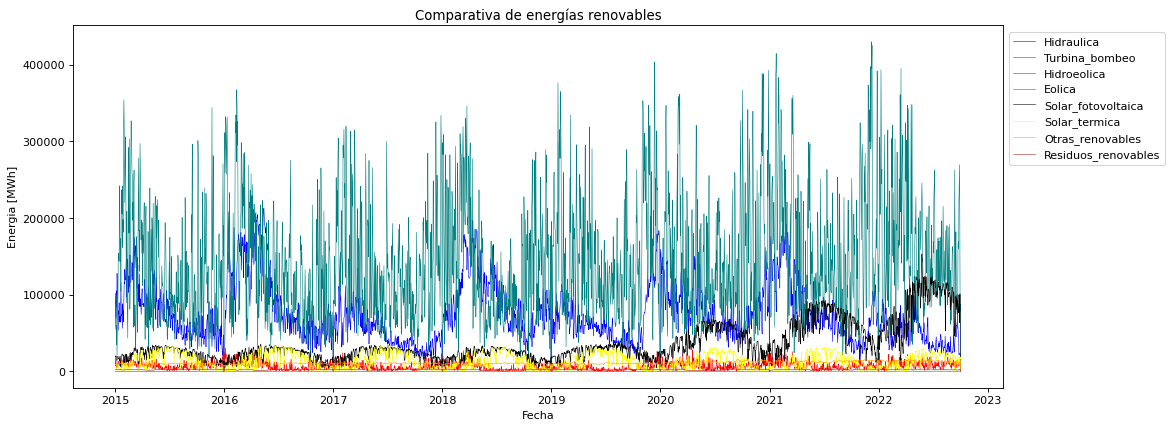

In [9]:
figure(figsize=(15,6), dpi=80)

labels_renovables=['Hidraulica','Turbina_bombeo','Hidroeolica','Eolica','Solar_fotovoltaica',
                   'Solar_termica','Otras_renovables','Residuos_renovables','Solar_termica']

plt.plot(df_produccion['Hidraulica'], color='blue', linewidth=0.5)
plt.plot(df_produccion['Turbina_bombeo'], color='red', linewidth=0.5)
plt.plot(df_produccion['Hidroeolica'], color='green', linewidth=0.5)
plt.plot(df_produccion['Eolica'], color='teal', linewidth=0.5)
plt.plot(df_produccion['Solar_fotovoltaica'], color='black', linewidth=0.5)
plt.plot(df_produccion['Solar_termica'], color='yellow', linewidth=0.5)
plt.plot(df_produccion['Otras_renovables'], color='orange', linewidth=0.5)
plt.plot(df_produccion['Residuos_renovables'], color='brown', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel(f'Energia [MWh]')
plt.title(f'Comparativa de energías renovables')
plt.legend(labels_renovables, loc="lower left", bbox_to_anchor=(1.0,0.6))
plt.savefig(f"images/Energías_renovables_series_temporales.jpg",bbox_inches='tight',dpi=300)
plt.show()

`COMPARATIVA DE ENERGÍAS RENOVABLES (SIN EOLICA)`

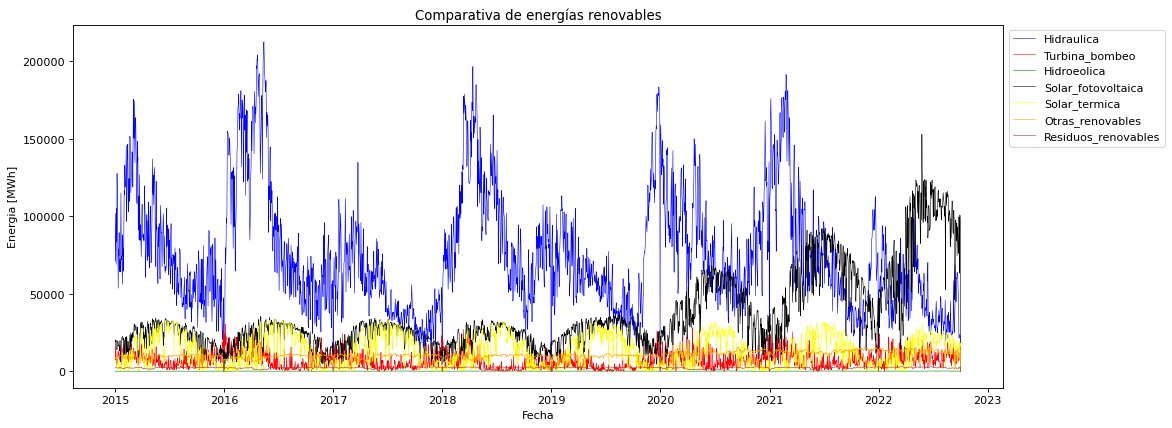

In [10]:
figure(figsize=(15,6), dpi=80)

labels_renovables=['Hidraulica','Turbina_bombeo','Hidroeolica','Solar_fotovoltaica',
                   'Solar_termica','Otras_renovables','Residuos_renovables','Solar_termica']

plt.plot(df_produccion['Hidraulica'], color='blue', linewidth=0.5)
plt.plot(df_produccion['Turbina_bombeo'], color='red', linewidth=0.5)
plt.plot(df_produccion['Hidroeolica'], color='green', linewidth=0.5)
plt.plot(df_produccion['Solar_fotovoltaica'], color='black', linewidth=0.5)
plt.plot(df_produccion['Solar_termica'], color='yellow', linewidth=0.5)
plt.plot(df_produccion['Otras_renovables'], color='orange', linewidth=0.5)
plt.plot(df_produccion['Residuos_renovables'], color='brown', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel(f'Energia [MWh]')
plt.title(f'Comparativa de energías renovables')
plt.legend(labels_renovables, loc="lower left", bbox_to_anchor=(1.0,0.65))
plt.savefig(f"images/Energías_renovables_series_temporales_wo_eolica.jpg",bbox_inches='tight',dpi=300)
plt.show()

`COMPARATIVA DE ENERGÍAS NO RENOVABLES`

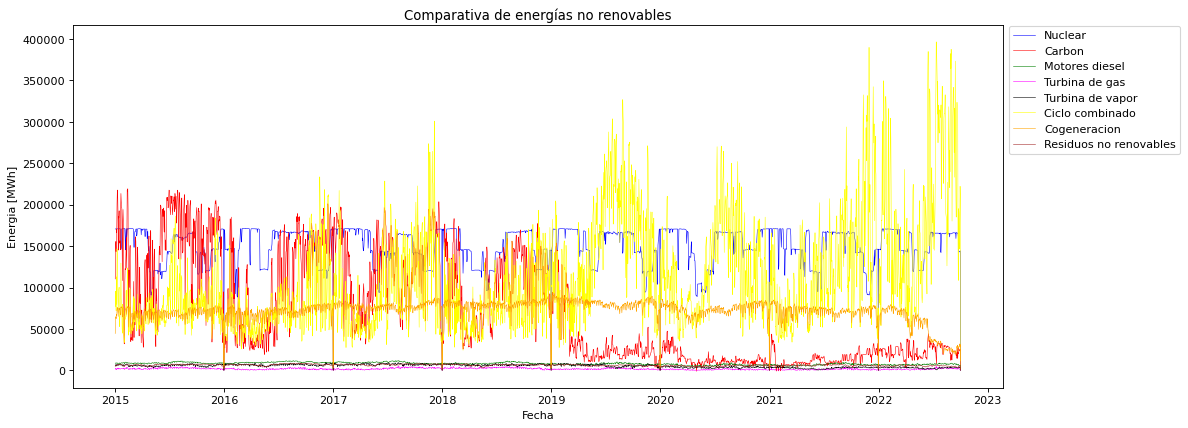

In [11]:
figure(figsize=(15,6), dpi=80)

labels_no_renovables=['Nuclear','Carbon','Motores diesel','Turbina de gas','Turbina de vapor',
        'Ciclo combinado','Cogeneracion','Residuos no renovables']

plt.plot(df_produccion['Nuclear'], color='blue', linewidth=0.5)
plt.plot(df_produccion['Carbon'], color='red', linewidth=0.5)
plt.plot(df_produccion['Motores_diesel'], color='green', linewidth=0.5)
plt.plot(df_produccion['Turbina_de_gas'], color='magenta', linewidth=0.5)
plt.plot(df_produccion['Turbina_de_vapor'], color='black', linewidth=0.5)
plt.plot(df_produccion['Ciclo_combinado'], color='yellow', linewidth=0.5)
plt.plot(df_produccion['Cogeneracion'], color='orange', linewidth=0.5)
plt.plot(df_produccion['Residuos_no_renovables'], color='brown', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel(f'Energia [MWh]')
plt.title(f'Comparativa de energías no renovables')
plt.legend(labels=labels_no_renovables, loc="lower left",bbox_to_anchor=(1.0,0.63))
plt.savefig(f"images/Energías__no_renovables_series_temporales.jpg",bbox_inches='tight',dpi=300)
plt.show()

`GRAFICO DE BARRAS ACUMULADAS POR AÑO`

In [12]:
lista_años=[2015,2016,2017,2018,2019,2020,2021,2022]
df_sum=produccion_año(df_produccion,lista_años)
df_sum

,Hidraulica,Turbina_bombeo,Nuclear,Carbon,Motores_diesel,Turbina_de_gas,Turbina_de_vapor,Ciclo_combinado,Hidroeolica,Eolica,Solar_fotovoltaica,Solar_termica,Otras_renovables,Cogeneracion,Residuos_no_renovables,Residuos_renovables
Año,,,,,,,,,,,,,,,,
2015,2.833324e+07,2876912.792,5.449860e+07,5.253443e+07,3336173.641,913647.328,2215450.894,2.895263e+07,8191.280,4.801408e+07,8.236409e+06,5.086328e+06,3425128.954,2.514544e+07,2.476596e+06,816625.6060
2016,3.607208e+07,3124949.714,5.585802e+07,3.714783e+07,3593516.274,614994.438,2528169.639,2.894256e+07,17823.701,4.765657e+07,7.962554e+06,5.065071e+06,3416073.447,2.584907e+07,2.600826e+06,782912.5340
2017,1.841088e+07,2240446.352,5.537588e+07,4.499508e+07,3447752.567,868914.792,2667247.329,3.703217e+07,20161.757,4.764402e+07,8.391072e+06,5.350116e+06,3602475.090,2.815552e+07,2.602406e+06,874416.6820
2018,3.404661e+07,1993564.064,5.305857e+07,3.722063e+07,3170439.095,1047951.388,2447498.803,2.994922e+07,23637.590,4.950946e+07,7.747063e+06,4.420137e+06,3549068.963,2.894074e+07,2.429247e+06,871543.0470
2019,2.455954e+07,1640061.929,5.566081e+07,1.265842e+07,2828506.728,668942.988,2184094.616,5.512765e+07,23249.176,5.420501e+07,9.230702e+06,5.164187e+06,3609509.229,2.955177e+07,2.218348e+06,887446.4720
2020,3.050887e+07,2744446.235,5.559450e+07,5.015211e+06,2392241.727,406020.732,1383923.144,4.395091e+07,19528.938,5.468013e+07,1.527381e+07,4.534635e+06,4469348.673,2.697002e+07,2.012044e+06,724598.0470
2021,2.953026e+07,2633216.311,5.390069e+07,4.960089e+06,2510136.297,423011.230,1104205.729,4.444329e+07,23044.330,6.038125e+07,2.090603e+07,4.698037e+06,4705202.571,2.602830e+07,2.232148e+06,875255.7915
2022,1.313558e+07,2526006.458,4.286406e+07,6.430258e+06,1974601.652,470829.392,868998.557,5.269034e+07,20061.542,4.394072e+07,2.327295e+07,3.829364e+06,3643691.778,1.417679e+07,1.494617e+06,670089.9380


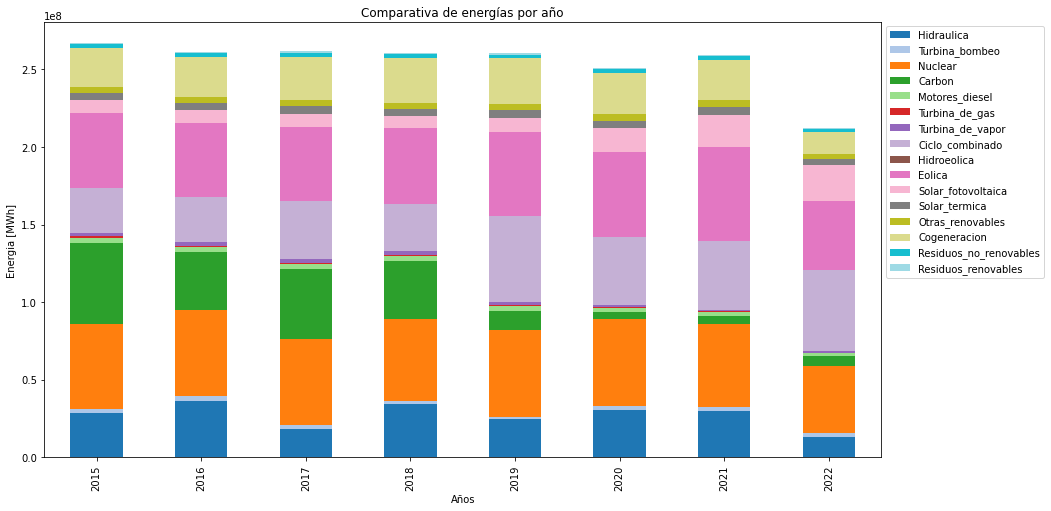

In [13]:
df_sum.plot(kind='bar', stacked='True', figsize=(15,8), colormap='tab20')
plt.xlabel('Años')
plt.ylabel('Energia [MWh]')
plt.title(f'Comparativa de energías por año')
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.4))
plt.savefig(f"images/Comparativa_energias.jpg",bbox_inches='tight',dpi=300)
plt.show()

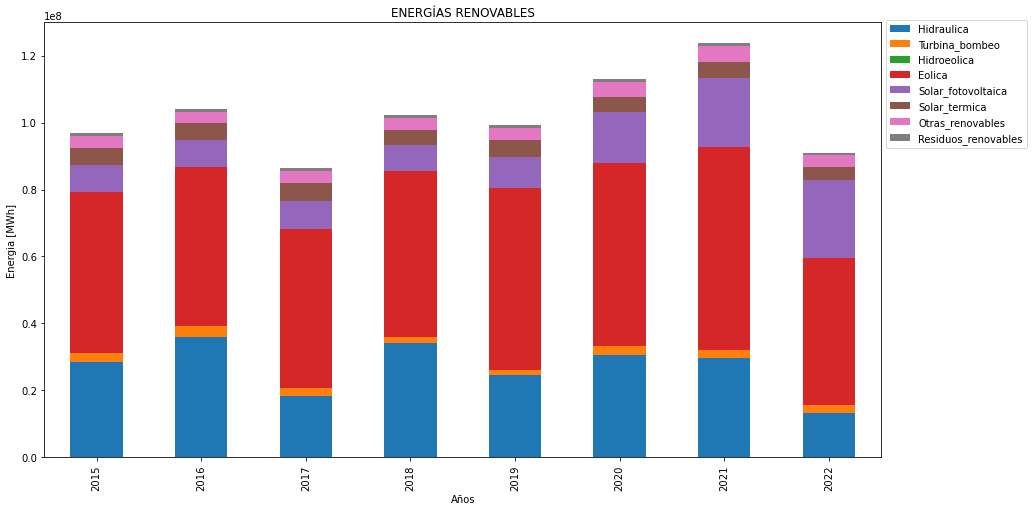

In [14]:
renovables=df_sum[['Hidraulica','Turbina_bombeo','Hidroeolica','Eolica','Solar_fotovoltaica','Solar_termica','Otras_renovables','Residuos_renovables']]
renovables.plot(kind='bar', stacked='True', figsize=(15,8))
plt.xlabel('Años')
plt.ylabel('Energia [MWh]')
plt.title('ENERGÍAS RENOVABLES')
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.7))
plt.savefig(f"images/Energias_renovables_stackedbar.jpg",bbox_inches='tight',dpi=300)
plt.show()

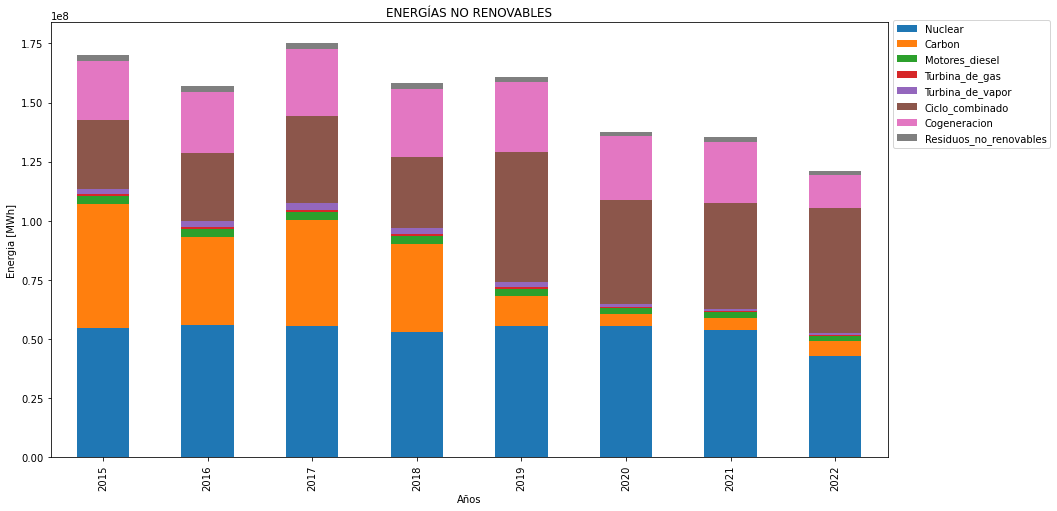

In [15]:
no_renovables=df_sum[['Nuclear','Carbon','Motores_diesel','Turbina_de_gas','Turbina_de_vapor','Ciclo_combinado','Cogeneracion','Residuos_no_renovables']]
no_renovables.plot(kind='bar', stacked='True', figsize=(15,8))
plt.xlabel('Años')
plt.ylabel('Energia [MWh]')
plt.title('ENERGÍAS NO RENOVABLES')
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.7))
plt.savefig(f"images/Energias_no_renovables_stackedbar.jpg",bbox_inches='tight',dpi=300)
plt.show()

`EVOLUCIÓN DE ENERGIAS RENOVABLES VS. NO RENOVABLES`

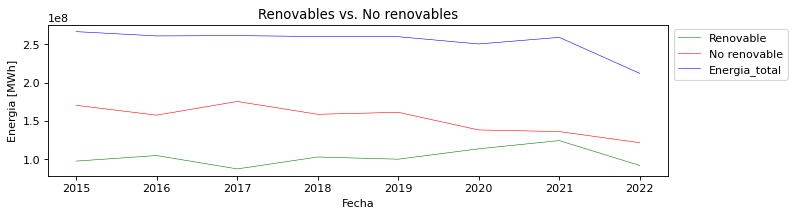

In [16]:
renovables=[df_sum.loc[i][['Hidraulica','Turbina_bombeo','Hidroeolica','Eolica','Solar_fotovoltaica','Solar_termica','Otras_renovables','Residuos_renovables']].sum() for i in df_sum.index]
no_renovables=[df_sum.loc[i][['Nuclear','Carbon','Motores_diesel','Turbina_de_gas','Turbina_de_vapor','Ciclo_combinado','Cogeneracion','Residuos_no_renovables']].sum() for i in df_sum.index]

etiquetas=['Renovable','No renovable','Energia_total']


df_energias=pd.DataFrame(zip(renovables, no_renovables), columns=['Renovable', 'No_renovable'])
df_energias['Energia_total']=df_energias['Renovable']+df_energias['No_renovable']
df_energias.index=[str(i) for i in range(2015,2023)]

figure(figsize=(10,2.5), dpi=80)
plt.plot(df_energias['Renovable'], color='green', linewidth=0.5)
plt.plot(df_energias['No_renovable'], color='red', linewidth=0.5)
plt.plot(df_energias['Energia_total'], color='blue', linewidth=0.5)

plt.xlabel('Fecha')
plt.ylabel(f'Energia [MWh]')
plt.title(f'Renovables vs. No renovables')
plt.legend(labels=etiquetas, loc="lower left", bbox_to_anchor=(1,0.6))
plt.savefig(f"images/Comparativa_energias_renov_no_renov.jpg",bbox_inches='tight',dpi=300)
plt.show()

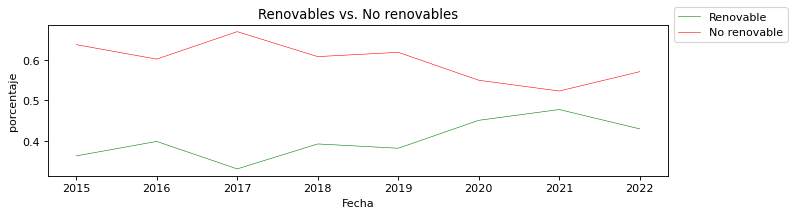

In [17]:
df_energias['en_renov_1']=df_energias['Renovable']/df_energias['Energia_total']
df_energias['en_no_renov_1']=df_energias['No_renovable']/df_energias['Energia_total']

figure(figsize=(10,2.5), dpi=80)

plt.plot(df_energias['en_renov_1'], color='green', linewidth=0.5)
plt.plot(df_energias['en_no_renov_1'], color='red', linewidth=0.5)

plt.xlabel('Fecha')
plt.ylabel('porcentaje')
plt.title(f'Renovables vs. No renovables')
plt.legend(labels=['Renovable','No renovable'], loc="lower left", bbox_to_anchor=(1,0.85))
plt.show()

In [18]:
years=list(df_energias.index)
df_energias['en_renov_1']=df_energias['Renovable']/df_energias['Energia_total']
df_energias['en_no_renov_1']=df_energias['No_renovable']/df_energias['Energia_total']
df_energias['años']=years
df_energias

,Renovable,No_renovable,Energia_total,en_renov_1,en_no_renov_1,años
2015,9.679691e+07,1.700730e+08,2.668699e+08,0.362712,0.637288,2015
2016,1.040980e+08,1.571350e+08,2.612330e+08,0.398487,0.601513,2016
2017,8.653358e+07,1.751450e+08,2.616786e+08,0.330687,0.669313,2017
2018,1.021611e+08,1.582643e+08,2.604254e+08,0.392285,0.607715,2018
2019,9.931971e+07,1.608985e+08,2.602182e+08,0.381678,0.618322,2019
2020,1.129554e+08,1.377249e+08,2.506802e+08,0.450595,0.549405,2020
2021,1.237523e+08,1.356019e+08,2.593542e+08,0.477156,0.522844,2021
2022,9.103846e+07,1.209705e+08,2.120090e+08,0.429409,0.570591,2022


<Figure size 1200x400 with 0 Axes>

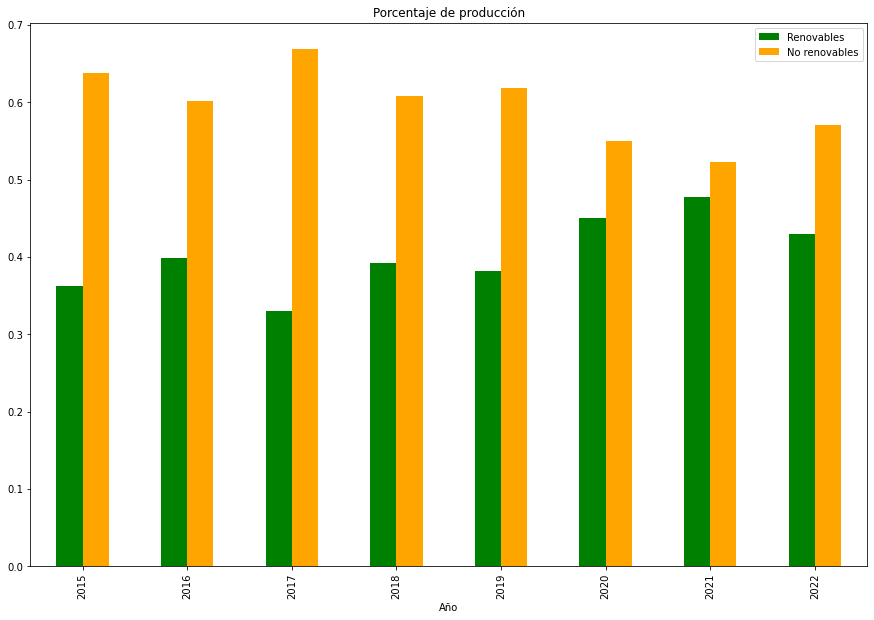

In [19]:
figure(figsize=(15,5), dpi=80)
fig, ax = plt.subplots()
df_energias.plot.bar(x ='años', y = ['en_renov_1', 'en_no_renov_1'], ax=ax, figsize=(15,10), color=['green', 'orange'])
plt.title('Porcentaje de producción')
plt.xlabel('Año')
plt.legend(labels=['Renovables','No renovables'], loc="lower left", bbox_to_anchor=(0.86,0.92))
plt.savefig("images/Comparativa_renovable_vs_no_renovable.jpg",bbox_inches='tight',dpi=300)
plt.show()